In [1]:
%matplotlib inline
import pymongo
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### walshPercentEffectRemainingAtTime
     Returns the percentage of total insulin effect remaining at a specified interval after delivery; also known as Insulin On Board (IOB).

     These are 4th-order polynomial fits of John Walsh's IOB curve plots, and they first appeared in GlucoDyn.

     See: https://github.com/kenstack/GlucoDyn

     - parameter time:           The interval (in hours) after insulin delivery
     - parameter actionDuration: The total time of insulin effect (in hours)

     - returns: The percentage of total insulin effect remaining

In [8]:

def walsh_percent_effect_remaining_at_time(time, action_duration):
#     if t <= 0:
#         return 1
#     elif t >= action_duration:
#         return 0
    
    nearest_modeled_duration = None
   
    if action_duration < 3:
        nearest_modeled_duration = 3
    elif action_duration > 6:
        nearest_modeled_duration = 6
    else: 
        nearest_modeled_duration = round(action_duration)
    
    minutes = (time*60) * nearest_modeled_duration / action_duration
    
    if nearest_modeled_duration == 3:
        return -3.2030e-9 * pow(minutes, 4) + 1.354e-6 * pow(minutes, 3) - 1.759e-4 * pow(minutes, 2) + 9.255e-4 * minutes + 0.99951
    elif nearest_modeled_duration == 4:
        return -3.310e-10 * pow(minutes, 4) + 2.530e-7 * pow(minutes, 3) - 5.510e-5 * pow(minutes, 2) - 9.086e-4 * minutes + 0.99950
    elif nearest_modeled_duration == 5:
        return -2.950e-10 * pow(minutes, 4) + 2.320e-7 * pow(minutes, 3) - 5.550e-5 * pow(minutes, 2) + 4.490e-4 * minutes + 0.99300
    elif nearest_modeled_duration == 6:
        return -1.493e-10 * pow(minutes, 4) + 1.413e-7 * pow(minutes, 3) - 4.095e-5 * pow(minutes, 2) + 6.365e-4 * minutes + 0.99700
    else:
        raise Exception('Invalid!')
    

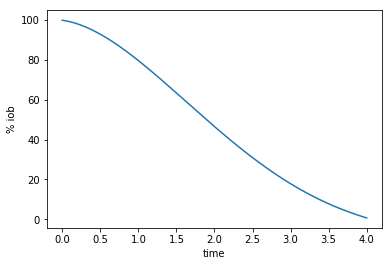

In [9]:
# 4 hour DIA IOB decay curve
x = np.linspace(0,4,num=200)
y = [walsh_percent_effect_remaining_at_time(t,4) * 100 for t in x]
plt.plot(x, y)
plt.xlabel('time')
plt.ylabel('% iob')
plt.show()

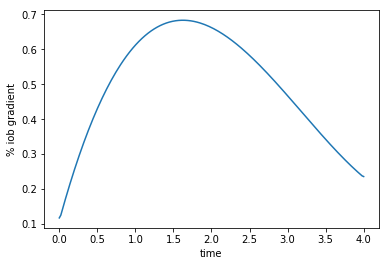

In [10]:
# 4 hour DIA activity
yp = np.gradient(np.array(y))
plt.plot(x, np.array(yp) * -1)
plt.xlabel('time')
plt.ylabel('% iob gradient')
plt.show()

### Experimental curve
I(t ) = t * exp(−t/τ) * u where t is the time since injection, τ is the time to peak activity and u is the magnitude of the insulin input.

The integral of that (what we use to calculate insulin decay) is τ(τ−(t+τ)exp(−t/τ))

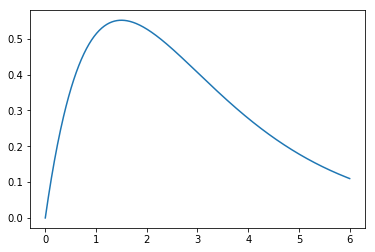

In [32]:
# New curve
# Show tau(peak) at 1 hour, over 6 hours
tau = 1.5
x = np.linspace(0,6,num=600)
activity = [t*math.exp(-t/tau) for t in x]
plt.plot(x, activity)


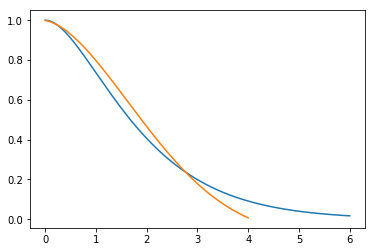

In [53]:
# New decay curve
#
tau = 1
old_dia = 4
new_dia = 6

new_x = np.linspace(0,new_dia,num=new_dia*100)
new_decay = [tau * (tau - (t + tau) * math.exp(-t/tau)) for t in new_x]
new_decay = np.array(new_decay) / pow(tau,2)
plt.plot(new_x, 1-new_decay)

walsh_x = np.linspace(0,old_dia,old_dia*100)
walsh_decay = np.array([walsh_percent_effect_remaining_at_time(t,old_dia) for t in walsh_x])
plt.plot(walsh_x, walsh_decay)
plt.show()

-0.993399874177
-0.982748449851
-0.982748449851


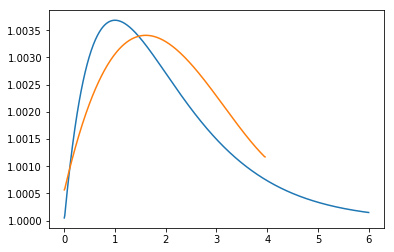

In [30]:

new_activity = np.gradient(new_decay)
plt.plot(new_x, 1-new_activity)
new_total = new_activity.sum()

walsh_activity = np.gradient(walsh_decay)
walsh_total = walsh_activity.sum()

# Scale activity so that total activity is equal 
print walsh_total
print new_total
scale = new_total / walsh_total
print walsh_total * scale

plt.plot(walsh_x * scale, 1-walsh_activity)